In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:

# Load data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = Sequential([
    Dense(64, input_shape=(8,), activation='relu'),  # 1st hidden layer
    Dense(32, activation='relu'),                    # 2nd hidden layer
    Dense(16, activation='relu'),                    # 3rd hidden layer
    Dense(8, activation='relu'),                     # 4th hidden layer
    Dense(1, activation='sigmoid')                   # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6902 - loss: 0.6444 - val_accuracy: 0.6098 - val_loss: 0.6305
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6320 - loss: 0.5820 - val_accuracy: 0.6098 - val_loss: 0.5796
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6862 - loss: 0.5239 - val_accuracy: 0.6748 - val_loss: 0.5410
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7287 - loss: 0.4896 - val_accuracy: 0.6911 - val_loss: 0.5152
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7821 - loss: 0.4733 - val_accuracy: 0.7398 - val_loss: 0.5023
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7932 - loss: 0.4792 - val_accuracy: 0.7561 - val_loss: 0.4955
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7822 - loss: 0.4662 - val_accuracy: 0.7642 - val_loss: 0.4909
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8181 - loss: 0.4350 - val_accuracy: 0.

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7502 - loss: 0.5336

Test Accuracy: 0.7597


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

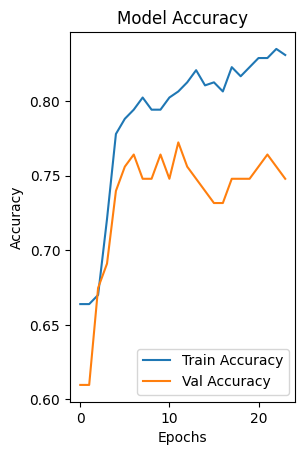

In [13]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

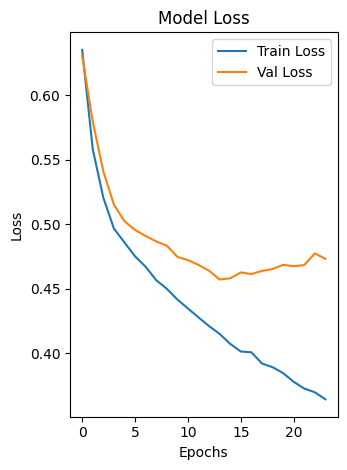

In [14]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>